# **How to Train Detectron2 on Custom Objects**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/mushrooms.png)

To train our detector we take the following steps:

* Install Detectron2 dependencies
* Download custom Detectron2 object detection data
* Visualize Detectron2 training data
* Write our Detectron2 Training configuration
* Run Detectron2 training
* Evaluate Detectron2 performance
* Run Detectron2 inference on test images



### **About**

[Roboflow](https://roboflow.ai) enables teams to deploy custom computer vision models quickly and accurately. Convert data from to annotation format, assess dataset health, preprocess, augment, and more. It's free for your first 1000 source images.

#### ![Roboflow Workmark](https://i.imgur.com/WHFqYSJ.png)

# Install Detectron2 Dependencies

In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8 MB 22 kB/s 
     |████████████████████████████████| 6.6 MB 53.0 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.5.0+cu101 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.5.0+cu101 which is incompatible.
     |████████████████████████████████| 274 kB 7.5 MB/s 
  Created wheel fo

In [ ]:
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     |████████████████████████████████| 6.2 MB 4.6 MB/s 
     |████████████████████████████████| 55 kB 3.1 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220119-py3-none-any.whl size=65267 sha256=1c00a8e4a41ba4a6e6b72375c748499c3ad67166520d5c47d1e4a8dad4e977d3
  Stored in directory: /root/.cache/pip/wheels/f3/b8/eb/61ed840f80d7198725bc061872b6019a7b3e9db4dbadf68083
Successfully built fvcore


In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog

# Import and Register Custom Detectron2 Data

In [ ]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/North+American+Mushrooms.v1-416x416.coco.zip
!unzip -q 'North American Mushrooms.v1-416x416.coco.zip'

Downloading...
From: https://drive.google.com/uc?id=1TDuqsV91I_84E4FsJp9c9F0SwYXZpcNv
To: /content/North American Mushrooms.v1-416x416.coco.zip
100% 1.76M/1.76M [00:00<00:00, 113MB/s]


In [ ]:
!curl -L "https://public.roboflow.com/ds/6lksQTPxfb?key=FMnBpxKVpK" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   887  100   887    0     0   1168      0 --:--:-- --:--:-- --:--:--  1167
100 1719k  100 1719k    0     0  1611k      0  0:00:01  0:00:01 --:--:-- 1611k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/_annotations.coco.json  
 extracting: test/chanterelle_02_jpg.rf.f7a48494b7393c532f641585d99a57be.jpg  
 extracting: test/chanterelle_03_jpg.rf.580f8d787af6a8050c21c065bf016f20.jpg  
 extracting: test/chanterelle_03_jpg.rf.cd892d2f06d228ba20d194fc360320fc.jpg  
 extracting: test/chanterelle_07_jpg.rf.6a8121422f738876d299cd11437b1855.jpg  
 extracting: test/chicken01_jpg.rf.6232850cea082a1ecc27f121c60ceb10.jpg  
   creating: train/
 extracting: train/_annotations.coco.json  
 extracting: train/chanterelle-mushrooms-1-1_png_jpg.rf.883f469a44821

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/content/train/_annotations.coco.json", "/content/train")
register_coco_instances("my_dataset_val", {}, "/content/valid/_annotations.coco.json", "/content/valid")
register_coco_instances("my_dataset_test", {}, "/content/test/_annotations.coco.json", "/content/test")


WARNING [01/24 19:10:35 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/24 19:10:35 d2.data.datasets.coco]: Loaded 41 images in COCO format from /content/train/_annotations.coco.json


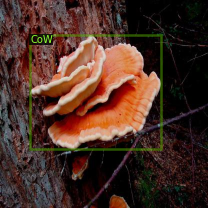

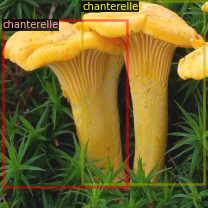

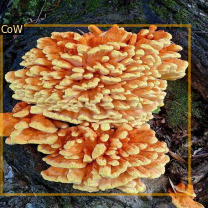

In [ ]:
#visualize training data
my_dataset_train_metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")

import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

# Train Custom Detectron2 Detector

In [ ]:
#We are importing our own Trainer Module here to use the COCO validation evaluation during training. Otherwise no validation eval occurs.

from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [ ]:
#from .detectron2.tools.train_net import Trainer
#from detectron2.engine import DefaultTrainer
# select from modelzoo here: https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md#coco-object-detection-baselines

from detectron2.config import get_cfg
#from detectron2.evaluation.coco_evaluation import COCOEvaluator
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)

cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001


cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 1500 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05




cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4 #your number of classes + 1

cfg.TEST.EVAL_PERIOD = 500


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[01/24 19:10:47 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_68b088.pkl: 421MB [00:07, 56.5MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (5, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (5,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (16, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (16,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_p

[01/24 19:11:02 d2.engine.train_loop]: Starting training from iteration 0
[01/24 19:11:25 d2.utils.events]:  eta: 0:28:51  iter: 19  total_loss: 2.472  loss_cls: 1.560  loss_box_reg: 0.899  loss_rpn_cls: 0.003  loss_rpn_loc: 0.005  time: 1.1668  data_time: 0.0305  lr: 0.000020  max_mem: 7215M
[01/24 19:11:48 d2.utils.events]:  eta: 0:28:32  iter: 39  total_loss: 2.045  loss_cls: 1.162  loss_box_reg: 0.913  loss_rpn_cls: 0.003  loss_rpn_loc: 0.006  time: 1.1687  data_time: 0.0137  lr: 0.000040  max_mem: 7215M
[01/24 19:12:12 d2.utils.events]:  eta: 0:28:13  iter: 59  total_loss: 1.629  loss_cls: 0.769  loss_box_reg: 0.913  loss_rpn_cls: 0.004  loss_rpn_loc: 0.006  time: 1.1727  data_time: 0.0132  lr: 0.000060  max_mem: 7215M
[01/24 19:12:35 d2.utils.events]:  eta: 0:27:40  iter: 79  total_loss: 1.457  loss_cls: 0.526  loss_box_reg: 0.900  loss_rpn_cls: 0.002  loss_rpn_loc: 0.005  time: 1.1659  data_time: 0.0116  lr: 0.000080  max_mem: 7215M
[01/24 19:12:59 d2.utils.events]:  eta: 0:27:2

In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

In [ ]:
#test evaluation
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("my_dataset_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "my_dataset_test")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [07/03 23:00:20 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[07/03 23:00:20 d2.data.datasets.coco]: Loaded 5 images in COCO format from /content/test/_annotations.coco.json
[07/03 23:00:20 d2.data.build]: Distribution of instances among all 3 categories:
|  category  | #instances   |  category  | #instances   |  category   | #instances   |
|:----------:|:-------------|:----------:|:-------------|:-----------:|:-------------|
|  mushroom  | 0            |    CoW     | 1            | chanterelle | 8            |
|            |              |            |              |             |              |
|   total    | 9            |            |              |             |              |
[07/03 23:00:20 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[07/03 23:00:20 d2.data.common]: Serialized dataset takes 0.00 MiB
[07/03 23:00:20 d2.evaluation.evaluator]: Start inference on 5

OrderedDict([('bbox',
              {'AP': 90.73285007072135,
               'AP-CoW': 99.99999999999997,
               'AP-chanterelle': 81.46570014144272,
               'AP-mushroom': nan,
               'AP50': 91.27475247524752,
               'AP75': 91.27475247524752,
               'APl': 90.73285007072135,
               'APm': nan,
               'APs': nan})])

# Inference with Detectron2 Saved Weights



In [ ]:
%ls ./output/

coco_instances_results.json                       last_checkpoint
events.out.tfevents.1625351421.c2daa78e42f8.63.0  metrics.json
instances_predictions.pth                         model_final.pth


In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.DATASETS.TEST = ("my_dataset_test", )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("my_dataset_test")

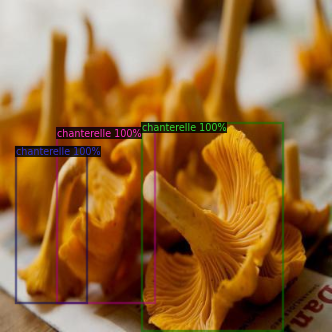

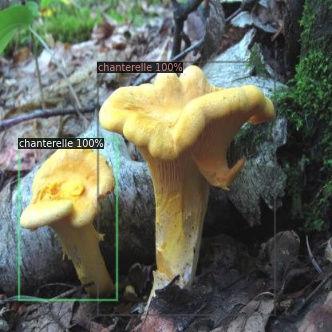

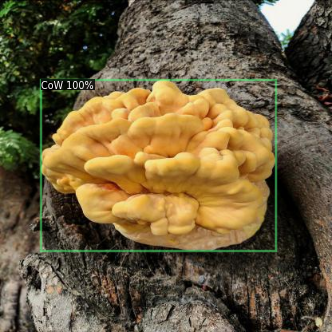

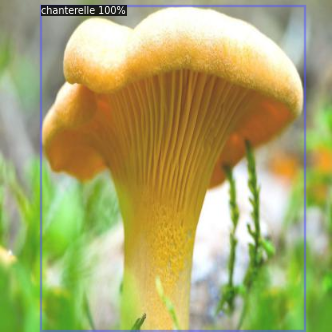

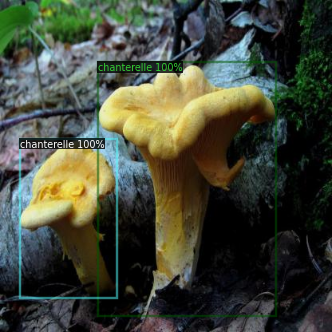

In [ ]:
from detectron2.utils.visualizer import ColorMode
import glob

for imageName in glob.glob('/content/test/*jpg'):
  im = cv2.imread(imageName)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata,
                scale=0.8
                 )
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])
